## 02 — Eigenvectors of the Mesh Laplacian

On a triangle mesh, the cotangent Laplacian $L$ and mass matrix $M$ define a generalized eigenproblem.  The resulting eigenvectors form the mesh’s version of a Fourier basis. We start with the natural question:

---

## What does “Fourier basis” mean on a mesh?

On the Real line, the usual Fourier basis is $\{1,\sin(nx),\cos(nx)\}.$ These functions are eigenfunctions of the Laplacian on the circle or an interval.  


On a surface we don’t have sines/cosines, but we do have the Laplace–Beltrami operator. We discretize it on a mesh with $L$ and $M$. The generalized eigenvectors $\phi_k$ play the same role as $\sin$ and $\cos$: they are the mesh’s oscillation modes.

---

## Calculating an orthonormal basis

Eigenvalue-eigenvector pairs are defined by solutions of the generalzied problem
$$
L\phi_k = \lambda_k M\phi_k.
$$

Recall that the mass matrix $M$ encodes the surface area element with respect to the inner product
$$
\langle f,g\rangle_M := f^\top M g \;\approx\; \int_{\text{surface}} f\,g\,dA.
$$

With this inner product, we can choose the eigenvectors to be $M$-orthonormal:
$$
\phi_i^\top M \phi_j = \delta_{ij}.
$$

---

## Fourier series on the mesh

Given a vertex function $u \in \mathbb{R}^V$, its $k^{\text{th}}$ Fourier coefficient  is
$$
c_k = \langle u,\phi_k\rangle_M = \phi_k^\top M u.
$$

Keeping only the first $K$ terms, we  can approximate
$$
u \approx \sum_{k=0}^{K-1} c_k\,\phi_k.
$$

This is the same idea as a Fourier series, just with $\phi_k$’s instead of sines/cosines.

---

## Why eigenvalues look like “squared frequencies”

A consequence of orthonormality is:
$$
u^\top L u = \sum_k \lambda_k\,c_k^2.
$$

- $\lambda_0 = 0$ corresponds to the constant function (since $L\mathbf{1}=0$ when rows sum to zero).
- Small $\lambda_k$ give smooth, slowly varying modes (low frequency).
- Large $\lambda_k$ give rapidly oscillating modes (high frequency).




---

## Connection to spheres / spherical harmonics

On a perfect sphere, these eigenfunctions are the spherical harmonics (the sphere’s version of Fourier modes).   On a general mesh, $\phi_k$ are the analogous “harmonics” determined by the surface geometry.


In [21]:
import os, sys
import pyvista as pv
pv.set_jupyter_backend('static')
#jupyter needs static to render

def _find_repo_root():
    for candidate in [os.getcwd(), os.path.abspath('..')]:
        if os.path.isdir(os.path.join(candidate, 'src')):
            return candidate
    raise FileNotFoundError("Can't find repo root. Run from the repo directory.")

ROOT = _find_repo_root()
sys.path.insert(0, ROOT)

import numpy as np
import matplotlib.pyplot as plt
from src.laplacian import (
    load_mesh, cotangent_weights, mass_matrix, spectral_decomposition
)
from src.viz import plot_eigenvectors, plot_eigenvalue_spectrum

%matplotlib inline

## Spectral decomposition of the sphere

We compute the first $k=30$ *nontrivial* eigenvector-eigenvalue pairs (skipping the constant eigenvector with eigenvalue $0$).

In [2]:
V, F = load_mesh(f'{ROOT}/meshes/sphere.obj')
L = cotangent_weights(V, F)
M = mass_matrix(V, F)

k = 30  # number of eigenvectors
eigenvalues, eigenvectors = spectral_decomposition(L, M, k=k)

print(f'Computed {k} eigenpairs')
print(f'Eigenvalue range: [{eigenvalues[0]:.4f}, {eigenvalues[-1]:.4f}]')
print(f'\nFirst 10 eigenvalues:')
for i, lam in enumerate(eigenvalues[:10]):
    print(f'  λ_{i+1} = {lam:.4f}')

Computed 30 eigenpairs
Eigenvalue range: [2.0000, 28.9843]

First 10 eigenvalues:
  λ_1 = 2.0000
  λ_2 = 2.0000
  λ_3 = 2.0000
  λ_4 = 5.9659
  λ_5 = 5.9659
  λ_6 = 5.9659
  λ_7 = 5.9659
  λ_8 = 5.9659
  λ_9 = 11.8270
  λ_10 = 11.8270


### Eigenvalue spectrum

For a sphere of radius $R$, the eigenvalues are $\lambda_\ell = \ell(\ell+1)/R^2$ with multiplicity $2\ell+1$.
So with $R=1$ (ignoring the  $\ell=0$ eigenvalue constant functions), we expect clusters: $3$ near $\lambda=2$, $5$ near $\lambda=6$, $7$ near $\lambda=12$, etc.

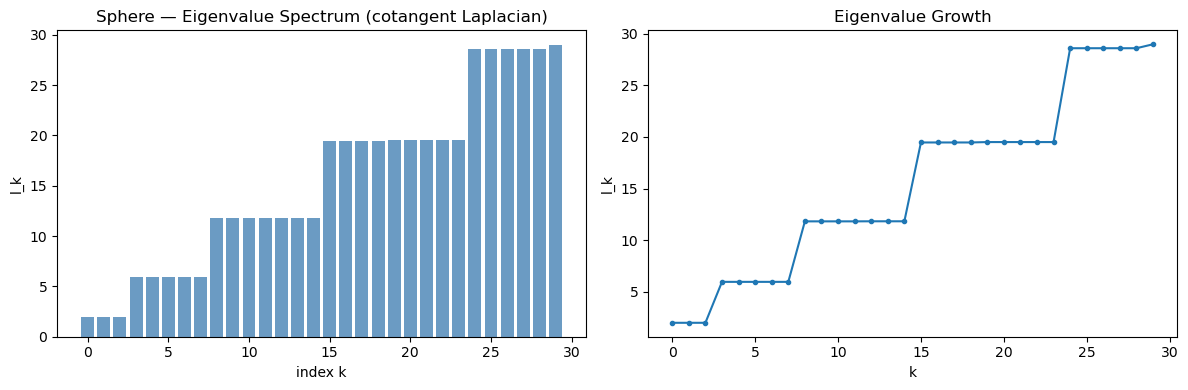

In [3]:
plot_eigenvalue_spectrum(
    eigenvalues,
    title='Sphere — Eigenvalue Spectrum (cotangent Laplacian)',
)

### Eigenvector visualization

Each eigenvector is a scalar fuction on the vertcies of the mesh. Higher eigenvalues correspond to more oscillatory modes just like higher order frequency Fourier modes. The colors represent:
- **Red**: positive values
- **Blue**: negative values  
- **White**: near zero 





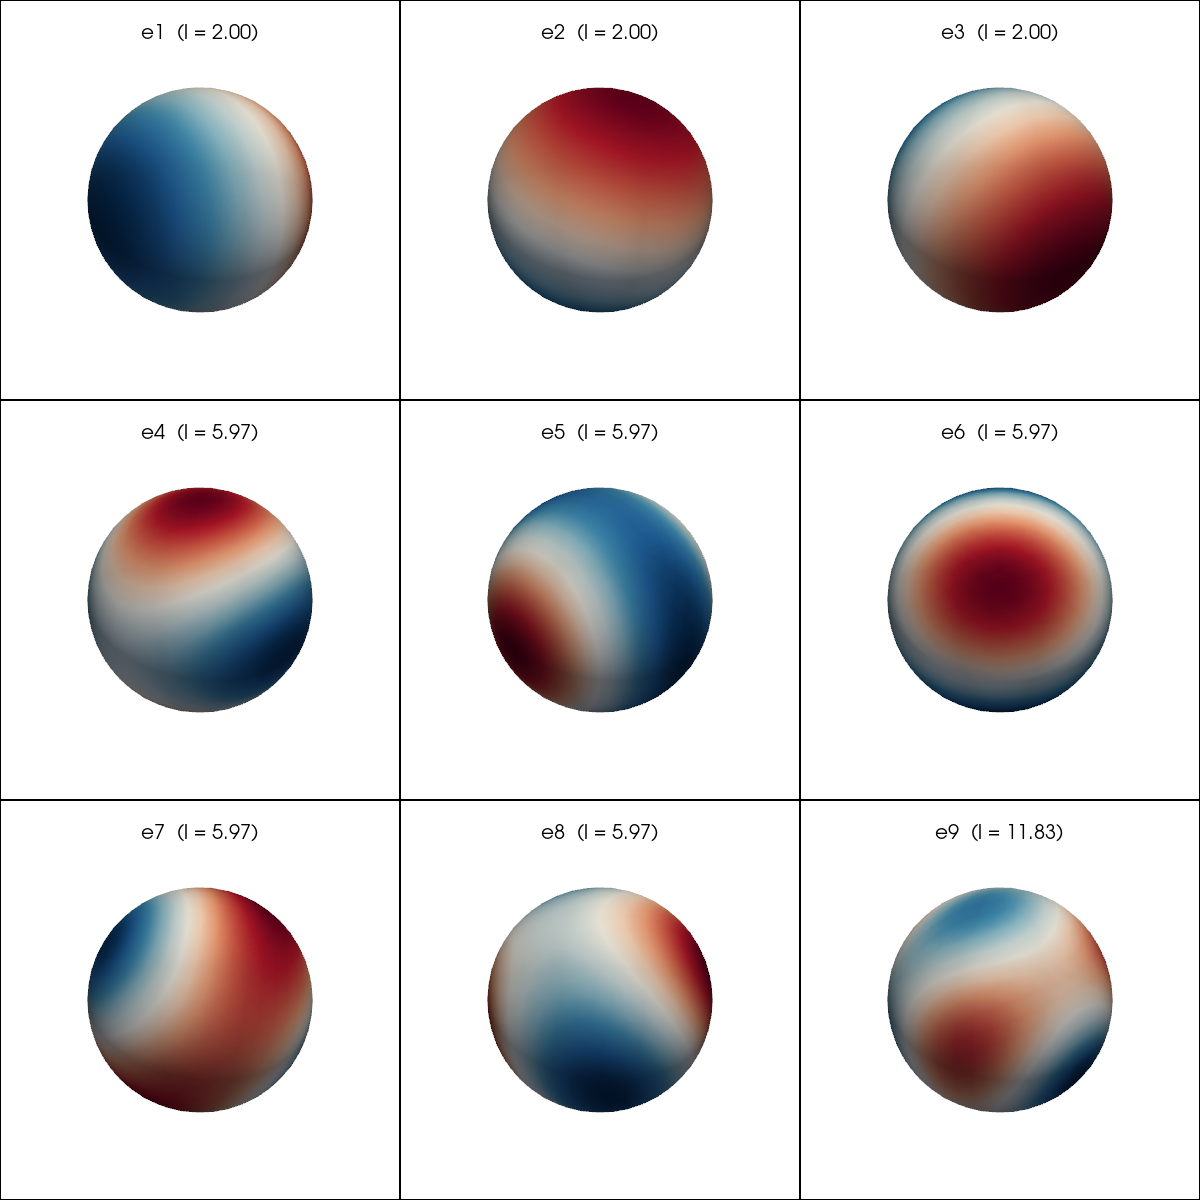

In [18]:
plot_eigenvectors(
    V, F, eigenvectors, eigenvalues,
    num=9,
    cmap='RdBu'
)

## Spectral decomposition of the torus

The torus has a different topology (genus 1) than a sphere (genus 0). Its spectrum and eigenvectors will thus differ.

In [11]:
V_t, F_t = load_mesh(f'{ROOT}/meshes/torus.obj')
L_t = cotangent_weights(V_t, F_t)
M_t = mass_matrix(V_t, F_t)

eigenvalues_t, eigenvectors_t = spectral_decomposition(L_t, M_t, k=k)

print(f'Torus: {len(V_t)} vertices, {len(F_t)} faces')
print(f'First 10 eigenvalues:')
for i, lam in enumerate(eigenvalues_t[:10]):
    print(f'  λ_{i+1} = {lam:.4f}')

Torus: 1800 vertices, 3600 faces
First 10 eigenvalues:
  λ_1 = 1.0299
  λ_2 = 1.0299
  λ_3 = 3.6021
  λ_4 = 3.6021
  λ_5 = 6.1706
  λ_6 = 6.7122
  λ_7 = 7.1458
  λ_8 = 7.1458
  λ_9 = 7.2679
  λ_10 = 7.2679


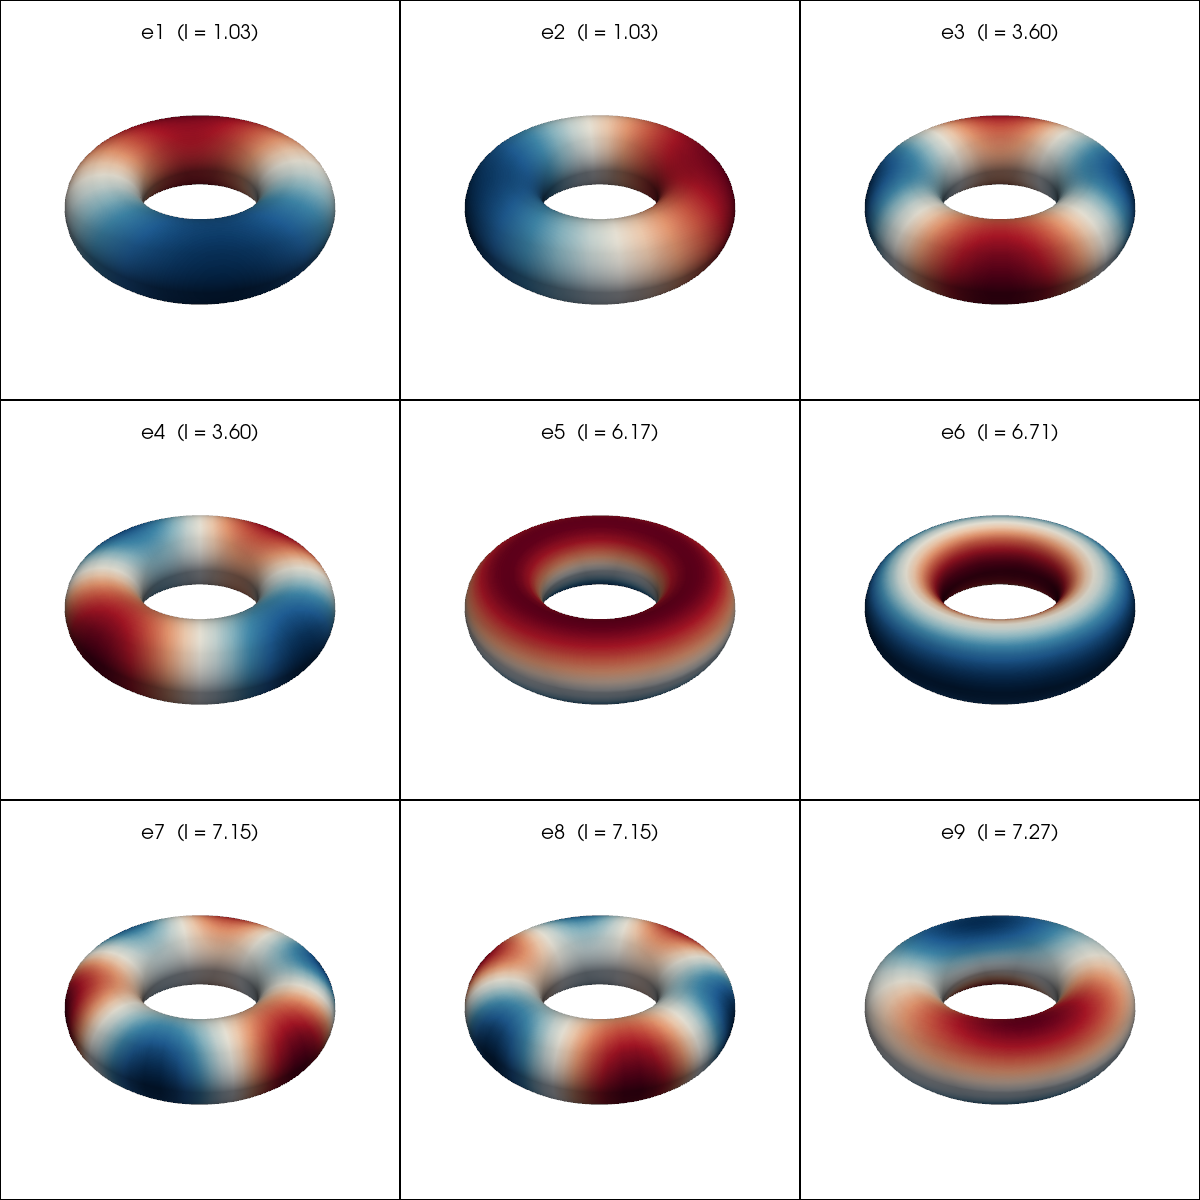

In [13]:
plot_eigenvectors(
    V_t, F_t, eigenvectors_t, eigenvalues_t,
    num=9,
    cmap='RdBu',
)

## Comparing spectra across shapes

The eigenvalue spectrum encodes geometric and topological information about the shape. In some sense it can be treated as genetic information of the shape.

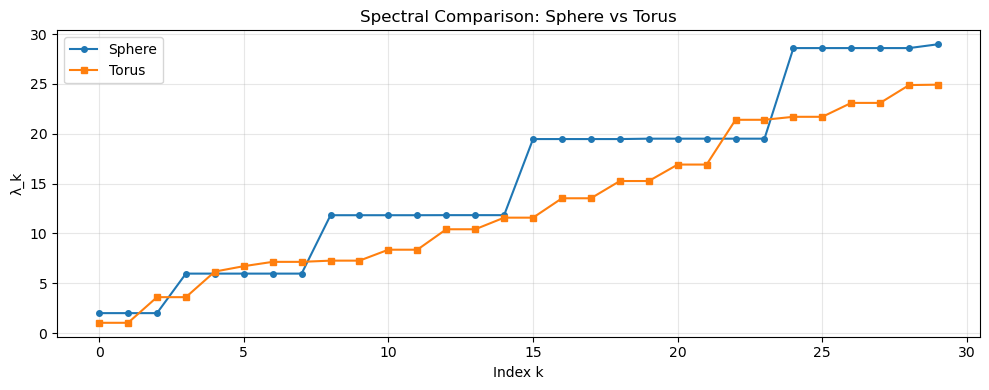

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(eigenvalues, 'o-', label='Sphere', markersize=4)
ax.plot(eigenvalues_t, 's-', label='Torus', markersize=4)
ax.set_xlabel('Index k')
ax.set_ylabel('λ_k')
ax.set_title('Spectral Comparison: Sphere vs Torus')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Next

In the next notebook, we study spectral embedding and demonstrate it on the sphere and torus.

## References

- Lévy, B. *Laplace–Beltrami Eigenfunctions: Towards an Algorithm that “Understands” Geometry* (SMI, 2006).  
- Reuter, M., Wolter, F.-E., & Peinecke, N. *Laplace–Beltrami Spectra as “Shape-DNA” of Surfaces and Solids* (Computer-Aided Design, 2006).  
